In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12210073671866957381
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6999657793133295394
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10568338174304735712
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:1"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11454114182648746913
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:2"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10810091421656105803
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15822884736
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
    link {
      de

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2"

In [ ]:
# cd /media/datastorage/Phong/svhn_v2

In [ ]:
ls

In [ ]:
mkdir svhn_v2

In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/extra_32x32.mat

In [ ]:
ls

In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

In [ ]:
from PIL import Image
import numpy

def convert_img_square(im_pth='', dest_path='', desired_size=224):
#     print(im_pth)
    
    im = Image.open(im_pth)
    old_size = im.size  # (width, height) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

#     new_im = im.resize(new_size, Image.ANTIALIAS)
    new_im = im.resize(new_size)
    
    new_im = new_im.convert('RGB')
    
    new_im.save(dest_path)

    return True
    
# path = 'train/0/twinjet_s_001442.png'
# dest_path = 't1/test4.jpg'

# orig_arr = convert_img_square(path, dest_path, 499)   

# #convert to RGB and Save
# # orig_arr = orig_arr.convert('RGB')
# # orig_arr.save('t1/test2.jpg')

# from IPython.display import Image 
# Image(filename='t1/test4.jpg')

In [ ]:
ls -l

In [ ]:
import os
import numpy as np
import struct
import scipy.io as sio
import matplotlib.pyplot as plt


def save_svhn():
    dir_name = "./svhn_train"
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
    print("Loading matlab train of SVHN")
    mat = sio.loadmat("train_32x32.mat")
    data = mat['X']
    folders = mat['y']
    
    for i in range(data.shape[3]):
        if not os.path.isfile(os.path.join(dir_name, str(folders[i][0]), "%05d.png" % i)):  
            # create folder if not existed
            if not os.path.exists(os.path.join(dir_name, str(folders[i][0]))):
                os.makedirs(os.path.join(dir_name, str(folders[i][0])))

            plt.imsave(os.path.join(dir_name, str(folders[i][0]), "%05d.png" % i), data[..., i])
            
    print("Program done!")

save_svhn()    

In [ ]:
import os
import numpy as np
import struct
import scipy.io as sio
import matplotlib.pyplot as plt


def save_svhn():
    dir_name = "./svhn_extra"
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
    print("Loading matlab data of SVHN")
    mat = sio.loadmat("extra_32x32.mat")
    data = mat['X']
    folders = mat['y']
    
    for i in range(data.shape[3]):
        if not os.path.isfile(os.path.join(dir_name, str(folders[i][0]), "%05d.png" % i)):  
            # create folder if not existed
            if not os.path.exists(os.path.join(dir_name, str(folders[i][0]))):
                os.makedirs(os.path.join(dir_name, str(folders[i][0])))

            plt.imsave(os.path.join(dir_name, str(folders[i][0]), "%05d.png" % i), data[..., i])
            
    print("Program done!")

save_svhn()    

In [ ]:
import os
import numpy as np
import struct
import scipy.io as sio
import matplotlib.pyplot as plt


def save_svhn_test():
    dir_name = "./svhn_test"
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
    print("Loading matlab data of SVHN")
    mat = sio.loadmat("test_32x32.mat")
    data = mat['X']
    folders = mat['y']
    
    for i in range(data.shape[3]):
        if not os.path.isfile(os.path.join(dir_name, str(folders[i][0]), "%05d.png" % i)):  
            # create folder if not existed
            if not os.path.exists(os.path.join(dir_name, str(folders[i][0]))):
                os.makedirs(os.path.join(dir_name, str(folders[i][0])))

            plt.imsave(os.path.join(dir_name, str(folders[i][0]), "%05d.png" % i), data[..., i])
            
    print("done!")

save_svhn_test()   

In [ ]:
ls 

In [ ]:
####=======================
import glob
import os
import shutil
import random
from PIL import Image
import numpy

#move class folder from classname_# to classname/#

def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename

move_folders = ['svhn_train']
dest_folder = 'train_resized_299'
data_file = []

# look for all images in sub-folders
for folder in move_folders:
    class_folders = glob.glob(os.path.join(folder, '*'))
    print('folder %s' %class_folders)
    
#     for sub_folder in class_folders:
#         sub_class_folders = glob.glob(os.path.join(sub_folder, '*'))    
#         print('sub folder %s' %sub_class_folders)
        
    for iid_class in class_folders:
        print(iid_class)
        
        class_files = glob.glob(os.path.join(iid_class, '*.png'))
        
#         #Determize Set# (No Suffle)
        set = len(class_files)
        inner = range(0*set, 1*set) #all

        print('moving %d files' %(len(inner)))

#         random_list = random.sample(range(len(class_files)), int(len(class_files)/5)) #1/5 dataset
#         for idx in range(len(random_list)):

        for idx in range(len(inner)):
            src = class_files[inner[idx]]

            train_or_test, classname, filename_no_ext, filename = get_image_parts(src)
            dst = os.path.join(dest_folder, classname, 'train_'+filename)

            # image directory
            img_directory = os.path.join(dest_folder, classname)

            # create folder if not existed
            if not os.path.exists(img_directory):
                os.makedirs(img_directory)
                
            # convert image
            convert_img_square(src, dst, 299)
            #moving file
            # shutil.move(src, dst)
#                 shutil.copy(src, dst)


In [ ]:
####=======================
import glob
import os
import shutil
import random
from PIL import Image
import numpy

#move class folder from classname_# to classname/#

def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename

move_folders = ['svhn_extra']
dest_folder = 'train_resized_299'
data_file = []

# look for all images in sub-folders
for folder in move_folders:
    class_folders = glob.glob(os.path.join(folder, '*'))
    print('folder %s' %class_folders)
    
#     for sub_folder in class_folders:
#         sub_class_folders = glob.glob(os.path.join(sub_folder, '*'))    
#         print('sub folder %s' %sub_class_folders)
        
    for iid_class in class_folders:
        print(iid_class)
        
        class_files = glob.glob(os.path.join(iid_class, '*.png'))
        
#         #Determize Set# (No Suffle)
        set = len(class_files)
        inner = range(0*set, 1*set) #all

        print('moving %d files' %(len(inner)))

#         random_list = random.sample(range(len(class_files)), int(len(class_files)/5)) #1/5 dataset
#         for idx in range(len(random_list)):

        for idx in range(len(inner)):
            src = class_files[inner[idx]]

            train_or_test, classname, filename_no_ext, filename = get_image_parts(src)
            dst = os.path.join(dest_folder, classname, 'extra_'+filename)

            # image directory
            img_directory = os.path.join(dest_folder, classname)

            # create folder if not existed
            if not os.path.exists(img_directory):
                os.makedirs(img_directory)
                
            # convert image
            convert_img_square(src, dst, 299)
            #moving file
            # shutil.move(src, dst)
#                 shutil.copy(src, dst)


In [ ]:
####=======================
import glob
import os
import shutil
import random
from PIL import Image
import numpy

#move class folder from classname_# to classname/#

def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename

move_folders = ['svhn_test']
dest_folder = 'test_resized_299'
data_file = []

# look for all images in sub-folders
for folder in move_folders:
    class_folders = glob.glob(os.path.join(folder, '*'))
    print('folder %s' %class_folders)
    
#     for sub_folder in class_folders:
#         sub_class_folders = glob.glob(os.path.join(sub_folder, '*'))    
#         print('sub folder %s' %sub_class_folders)
        
    for iid_class in class_folders:
        print(iid_class)
        
        class_files = glob.glob(os.path.join(iid_class, '*.png'))
        
#         #Determize Set# (No Suffle)
        set = len(class_files)
        inner = range(0*set, 1*set) #all

        print('moving %d files' %(len(inner)))

#         random_list = random.sample(range(len(class_files)), int(len(class_files)/5)) #1/5 dataset
#         for idx in range(len(random_list)):

        for idx in range(len(inner)):
            src = class_files[inner[idx]]

            train_or_test, classname, filename_no_ext, filename = get_image_parts(src)
            dst = os.path.join(dest_folder, classname, filename)

            # image directory
            img_directory = os.path.join(dest_folder, classname)

            # create folder if not existed
            if not os.path.exists(img_directory):
                os.makedirs(img_directory)
                
            # convert image
            convert_img_square(src, dst, 299)
            #moving file
            # shutil.move(src, dst)
#                 shutil.copy(src, dst)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [ ]:
!zip -r svhn_train_resized_229.zip svhn_train_resized_229
!zip -r svhn_test_resized_229.zip svhn_test_resized_229

In [ ]:
# %cp svhn_train_resized_229.zip gdrive/My\ Drive/svhn_train_resized_229.zip
# %cp svhn_test_resized_229.zip gdrive/My\ Drive/svhn_test_resized_229.zip 

In [ ]:
%cp gdrive/My\ Drive/svhn_train.zip svhn_train_32.zip 
%cp gdrive/My\ Drive/svhn_test.zip svhn_test_32.zip  

In [ ]:
!unzip -q svhn_train_32.zip
!unzip -q svhn_test_32.zip

In [ ]:
# !pip3 install -U git+https://github.com/qubvel/efficientnet

In [ ]:
# #MUL 1 - Inception - ST

# # from keras.applications import InceptionV3
# # from keras.applications import Xception
# # from keras.applications.inception_resnet_v2 import InceptionResNetV2
# from tensorflow.keras.applications import EfficientNetB1

# from keras.models import Model
# # from keras.layers import concatenate
# from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, SimpleRNN, LSTM, Flatten, GRU, Reshape

# # from keras.applications.inception_v3 import preprocess_input
# from tensorflow.keras.applications.efficientnet import preprocess_input
# # from efficientnet.keras import preprocess_input

# from keras.layers import GaussianNoise

# f1_base = EfficientNetB1(include_top=False, weights='imagenet', 
#                 input_shape=(299, 299, 3), 
#                 pooling='avg')

# # import efficientnet.keras as efn
# # f1_base = efn.EfficientNetB1(include_top=False, weights='imagenet', 
# #                 input_shape=(299, 299, 3), 
# #                 pooling='avg')

# # f1_base = Xception(weights='imagenet', include_top=False, input_shape=(450,450,3))

# f1_x = f1_base.output

# # f1_x = f1_base.layers[-151].output   #layer 5

# # f1_x = GlobalAveragePooling2D()(f1_x)
# # f1_x = Flatten()(f1_x)

# # f1_x = Reshape([1,1280])(f1_x)  
# # f1_x = SimpleRNN(2048, 
# #             return_sequences=False,                       
# # #             dropout=0.8                                     
# #             input_shape=[1,1280])(f1_x)

# #Regularization with noise
# f1_x = GaussianNoise(0.1)(f1_x)

# f1_x = Dense(1024, activation='relu')(f1_x)
# f1_x = Dense(10, activation='softmax')(f1_x)
# model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])

# model_1.summary()

In [3]:
#MUL 1 - Inception - ST

# from keras.applications import InceptionV3
# from keras.applications import Xception
# from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications import EfficientNetB3

from keras.models import Model
from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, SimpleRNN, LSTM, Flatten, GRU, Reshape

# from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input

from keras.layers import GaussianNoise

def get_adv_model():
    f1_base = EfficientNetB3(include_top=False, weights='imagenet', 
                    input_shape=(299, 299, 3), 
                    pooling='avg')
    # f1_base = Xception(weights='imagenet', include_top=False, input_shape=(450,450,3))

    f1_x = f1_base.output

# f1_x = f1_base.layers[-151].output   #layer 5

# f1_x = GlobalAveragePooling2D()(f1_x)
# f1_x = Flatten()(f1_x)

# f1_x = Reshape([1,1280])(f1_x)  
# f1_x = SimpleRNN(2048, 
#             return_sequences=False,                       
# #             dropout=0.8                                     
#             input_shape=[1,1280])(f1_x)
   
    #Regularization with noise
    f1_x = GaussianNoise(0.1)(f1_x)

    f1_x = Dense(1024, activation='relu')(f1_x)
    f1_x = Dense(10, activation='softmax')(f1_x)
    model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])
    model_1.summary()
    
    return model_1


In [4]:
from keras.callbacks import Callback
import pickle
import sys

#Stop training on val_acc
class EarlyStoppingByAccVal(Callback):
    def __init__(self, monitor='val_acc', value=0.00001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping" % epoch)
            self.model.stop_training = True

#Save large model using pickle formate instead of h5            
class SaveCheckPoint(Callback):
    def __init__(self, model, dest_folder):
        super(Callback, self).__init__()
        self.model = model
        self.dest_folder = dest_folder
        
        #initiate
        self.best_val_acc = 0
        self.best_val_loss = sys.maxsize #get max value
          
    def on_epoch_end(self, epoch, logs={}):
        val_acc = logs['val_acc']
        val_loss = logs['val_loss']

        if val_acc > self.best_val_acc:
            self.best_val_acc = val_acc
            
            # Save weights in pickle format instead of h5
            print('\nSaving val_acc %f at %s' %(self.best_val_acc, self.dest_folder))
            weigh= self.model.get_weights()

            #now, use pickle to save your model weights, instead of .h5
            #for heavy model architectures, .h5 file is unsupported.
            fpkl= open(self.dest_folder, 'wb') #Python 3
            pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
            fpkl.close()
            
#             model.save('tmp.h5')
        elif val_acc == self.best_val_acc:
            if val_loss < self.best_val_loss:
                self.best_val_loss=val_loss
                
                # Save weights in pickle format instead of h5
                print('\nSaving val_acc %f at %s' %(self.best_val_acc, self.dest_folder))
                weigh= self.model.get_weights()

                #now, use pickle to save your model weights, instead of .h5
                #for heavy model architectures, .h5 file is unsupported.
                fpkl= open(self.dest_folder, 'wb') #Python 3
                pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
                fpkl.close()                

In [ ]:

import numpy as np
import keras.backend as K
from PIL import Image

def get_cutout_v2(p=0.5, n_holes=2, length=20):
    def cutout(np_img):
        # print(type(image))
        # h = img.size(1)
        # w = img.size(2)
        img = Image.fromarray(((np_img)).astype(np.uint8))

        w, h = img.size
        mask = np.ones((h, w), np.float32)
        
        length = np.random.randint(low=w//16, high=w//4) #w=h

        for n in range(n_holes):
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - length // 2, 0, h)
            y2 = np.clip(y + length // 2, 0, h)
            x1 = np.clip(x - length // 2, 0, w)
            x2 = np.clip(x + length // 2, 0, w)

            mask[y1: y2, x1: x2] = 0.

        # mask = torch.from_numpy(mask)

        # ary = np.random.normal(size=(2, 2))
        # mask = K.cast(mask, dtype='float32')

        # mask = mask.expand_as(img)

        mask = np.expand_dims(mask, axis=2)

        re_img = img * mask

        return preprocess_input(re_img)
        # return re_img

    return cutout

In [ ]:
mkdir checkpoints

In [ ]:
%mkdir svhn_output
%mkdir svhn_output/logs

In [5]:
# Training
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam

import time, os
from math import ceil

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
#     horizontal_flip=True,
#     vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    # preprocessing_function=get_cutout_v2(),
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

# NUM_GPU = 4
batch_size = 96

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'st'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'SVHN_EffB3_299_v2_upgraded.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_accuracy', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('svhn_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('svhn_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

earlystopping = EarlyStoppingByAccVal(monitor='val_accuracy', value=0.9900, verbose=1)

epochs = 20##!!!
lr = 1e-3
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

# train on multiple-gpus

# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print("Number of GPUs: {}".format(strategy.num_replicas_in_sync))

# Open a strategy scope.
with strategy.scope():
    # Everything that creates variables should be under the strategy scope.
    # In general this is only model construction & `compile()`.
    model_mul = get_adv_model()
    model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[checkpointer],
#     callbacks=[csv_logger, checkpointer, earlystopping],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Found 604388 images belonging to 10 classes.
Found 26032 images belonging to 10 classes.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
Number of GPUs: 4
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to

Total params: 12,367,673
Trainable params: 12,280,370
Non-trainable params: 87,303
__________________________________________________________________________________________________
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.
INFO:tensorflow:batch_all_reduce: 342 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 342 all-reduces with algorithm = nccl, num_packs = 1
6029/6296 [===========================>..] - ETA: 18:50 - loss: 0.1670 - accuracy: 0.9511

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4242/6296 [===================>..........] - ETA: 2:25:05 - loss: 0.1035 - accuracy: 0.9710

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0993 - accuracy: 0.9722
Epoch 00002: val_accuracy did not improve from 0.97273
6296/6296 [==============================] - 27003s 4s/step - loss: 0.0993 - accuracy: 0.9722 - val_loss: 0.1118 - val_accuracy: 0.9726
Epoch 3/20
2831/6296 [============>.................] - ETA: 5:08:55 - loss: 0.0862 - accuracy: 0.9764

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0824 - accuracy: 0.9775
Epoch 00003: val_accuracy improved from 0.97273 to 0.97845, saving model to checkpoints/SVHN_EffB3_299_v2_upgraded.hdf5
6296/6296 [==============================] - 35089s 6s/step - loss: 0.0824 - accuracy: 0.9775 - val_loss: 0.0910 - val_accuracy: 0.9784
Epoch 4/20
1478/6296 [======>.......................] - ETA: 7:04:11 - loss: 0.0738 - accuracy: 0.9796

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0726 - accuracy: 0.9803
Epoch 00004: val_accuracy improved from 0.97845 to 0.98171, saving model to checkpoints/SVHN_EffB3_299_v2_upgraded.hdf5
6296/6296 [==============================] - 29083s 5s/step - loss: 0.0726 - accuracy: 0.9803 - val_loss: 0.0801 - val_accuracy: 0.9817
Epoch 5/20
  65/6296 [..............................] - ETA: 6:21:46 - loss: 0.0580 - accuracy: 0.9845

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.9824
Epoch 00005: val_accuracy improved from 0.98171 to 0.98248, saving model to checkpoints/SVHN_EffB3_299_v2_upgraded.hdf5
6296/6296 [==============================] - 25515s 4s/step - loss: 0.0657 - accuracy: 0.9824 - val_loss: 0.0775 - val_accuracy: 0.9825
Epoch 6/20
3093/6296 [=============>................] - ETA: 3:32:51 - loss: 0.0612 - accuracy: 0.9837

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0614 - accuracy: 0.9838
Epoch 00006: val_accuracy improved from 0.98248 to 0.98456, saving model to checkpoints/SVHN_EffB3_299_v2_upgraded.hdf5
6296/6296 [==============================] - 22507s 4s/step - loss: 0.0614 - accuracy: 0.9838 - val_loss: 0.0710 - val_accuracy: 0.9846
Epoch 7/20
6296/6296 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.9848
Epoch 00007: val_accuracy improved from 0.98456 to 0.98502, saving model to checkpoints/SVHN_EffB3_299_v2_upgraded.hdf5
6296/6296 [==============================] - 13417s 2s/step - loss: 0.0572 - accuracy: 0.9848 - val_loss: 0.0716 - val_accuracy: 0.9850
Epoch 8/20
6296/6296 [==============================] - ETA: 0s - loss: 0.0542 - accuracy: 0.9858
Epoch 00008: val_accuracy did not improve from 0.98502
6296/6296 [==============================] - 13377s 2s/step - loss: 0.0542 - accuracy: 0.9858 - val_loss: 0.0707 - val_accuracy: 0.9843
Epoch 9/20
373

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0510 - accuracy: 0.9865
Epoch 00009: val_accuracy did not improve from 0.98502
6296/6296 [==============================] - 27349s 4s/step - loss: 0.0510 - accuracy: 0.9865 - val_loss: 0.0707 - val_accuracy: 0.9849
Epoch 10/20
2653/6296 [===========>..................] - ETA: 4:21:40 - loss: 0.0489 - accuracy: 0.9874

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9873
Epoch 00010: val_accuracy did not improve from 0.98502
6296/6296 [==============================] - 27189s 4s/step - loss: 0.0487 - accuracy: 0.9873 - val_loss: 0.0745 - val_accuracy: 0.9825
Epoch 11/20
 624/6296 [=>............................] - ETA: 6:46:07 - loss: 0.0420 - accuracy: 0.9884

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5224/6296 [=======================>......] - ETA: 1:16:08 - loss: 0.0465 - accuracy: 0.9877

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.9882
Epoch 00012: val_accuracy did not improve from 0.98606
6296/6296 [==============================] - 27276s 4s/step - loss: 0.0451 - accuracy: 0.9882 - val_loss: 0.0699 - val_accuracy: 0.9854
Epoch 13/20
 451/6296 [=>............................] - ETA: 6:59:10 - loss: 0.0401 - accuracy: 0.9894

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3305/6296 [==============>...............] - ETA: 3:28:19 - loss: 0.0426 - accuracy: 0.9889

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9886
Epoch 00013: val_accuracy did not improve from 0.98606
6296/6296 [==============================] - 26754s 4s/step - loss: 0.0437 - accuracy: 0.9886 - val_loss: 0.0698 - val_accuracy: 0.9848
Epoch 14/20
  76/6296 [..............................] - ETA: 7:42:44 - loss: 0.0425 - accuracy: 0.9894

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4147/6296 [==================>...........] - ETA: 2:36:23 - loss: 0.0410 - accuracy: 0.9893

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9892
Epoch 00014: val_accuracy improved from 0.98606 to 0.98663, saving model to checkpoints/SVHN_EffB3_299_v2_upgraded.hdf5
6296/6296 [==============================] - 27803s 4s/step - loss: 0.0417 - accuracy: 0.9892 - val_loss: 0.0650 - val_accuracy: 0.9866
Epoch 15/20
1300/6296 [=====>........................] - ETA: 5:57:01 - loss: 0.0411 - accuracy: 0.9897

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0403 - accuracy: 0.9896
Epoch 00015: val_accuracy did not improve from 0.98663
6296/6296 [==============================] - 27427s 4s/step - loss: 0.0403 - accuracy: 0.9896 - val_loss: 0.0664 - val_accuracy: 0.9860
Epoch 16/20
6296/6296 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9899
Epoch 00016: val_accuracy did not improve from 0.98663
6296/6296 [==============================] - 25515s 4s/step - loss: 0.0390 - accuracy: 0.9899 - val_loss: 0.0662 - val_accuracy: 0.9859
Epoch 17/20
1824/6296 [=======>......................] - ETA: 5:03:01 - loss: 0.0370 - accuracy: 0.9904

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3051/6296 [=============>................] - ETA: 3:50:00 - loss: 0.0356 - accuracy: 0.9907

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4649/6296 [=====================>........] - ETA: 1:46:25 - loss: 0.0358 - accuracy: 0.9909

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.9910
Epoch 00020: val_accuracy improved from 0.98663 to 0.98671, saving model to checkpoints/SVHN_EffB3_299_v2_upgraded.hdf5
6296/6296 [==============================] - 27086s 4s/step - loss: 0.0347 - accuracy: 0.9910 - val_loss: 0.0686 - val_accuracy: 0.9867


In [5]:
# Training
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam

import time, os
from math import ceil

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
#     horizontal_flip=True,
#     vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    # preprocessing_function=get_cutout_v2(),
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

# NUM_GPU = 4
batch_size = 96

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'st'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'SVHN_EffB3_299_v2_upgraded_tmp.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_accuracy', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('svhn_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('svhn_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

earlystopping = EarlyStoppingByAccVal(monitor='val_accuracy', value=0.9900, verbose=1)

epochs = 20##!!!
lr = 1e-3
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

# train on multiple-gpus

# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print("Number of GPUs: {}".format(strategy.num_replicas_in_sync))

# Open a strategy scope.
with strategy.scope():
    # Everything that creates variables should be under the strategy scope.
    # In general this is only model construction & `compile()`.
    model_mul = get_adv_model()
    model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

# result = model_mul.fit_generator(
#     generator = train_set, 
#     steps_per_epoch = step_size_train,
#     validation_data = valid_set,
#     validation_steps = step_size_valid,
#     shuffle=True,
#     epochs=epochs,
#     callbacks=[checkpointer],
# #     callbacks=[csv_logger, checkpointer, earlystopping],
# #     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
#     verbose=1) 

Found 604388 images belonging to 10 classes.
Found 26032 images belonging to 10 classes.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2')
Number of GPUs: 3
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0'

block6f_project_bn (BatchNormal (None, 10, 10, 232)  928         block6f_project_conv[0][0]       
__________________________________________________________________________________________________
block6f_drop (Dropout)          (None, 10, 10, 232)  0           block6f_project_bn[0][0]         
__________________________________________________________________________________________________
block6f_add (Add)               (None, 10, 10, 232)  0           block6f_drop[0][0]               
                                                                 block6e_add[0][0]                
__________________________________________________________________________________________________
block7a_expand_conv (Conv2D)    (None, 10, 10, 1392) 322944      block6f_add[0][0]                
__________________________________________________________________________________________________
block7a_expand_bn (BatchNormali (None, 10, 10, 1392) 5568        block7a_expand_conv[0][0]        
__________

In [6]:
# Open a strategy scope.
with strategy.scope():
    model_mul.load_weights(os.path.join('checkpoints', 'SVHN_EffB3_299_v2_upgraded.hdf5'))

In [7]:
#Non-Groups
#Split training and validation
#Using Expert Data

savedfilename = os.path.join('checkpoints', 'SVHN_EffB3_299_v2_upgraded_L2.hdf5')
checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_accuracy', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

epochs = 15
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[checkpointer],
#     callbacks=[csv_logger, checkpointer, earlystopping],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.
INFO:tensorflow:batch_all_reduce: 342 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 342 all-reduces with algorithm = nccl, num_packs = 1
6296/6296 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9919
Epoch 00001: val_accuracy improved from -inf to 0.98671, saving model to checkpoints/SVHN_EffB3_299_v2_upgraded_L2.hdf5
6296/6296 [==============================] - 25257s 4s/step - loss: 0.0313 - accuracy: 0.9919 - val_loss: 0.0715 - val_accuracy: 0.9867
Epoch 2/15
5786/6296 [==========================>...] - ETA: 34:27 - loss: 0.0307 - accuracy: 0.9921

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4026/6296 [==================>...........] - ETA: 2:28:59 - loss: 0.0285 - accuracy: 0.9926

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0290 - accuracy: 0.9925
Epoch 00003: val_accuracy did not improve from 0.98671
6296/6296 [==============================] - 25074s 4s/step - loss: 0.0290 - accuracy: 0.9925 - val_loss: 0.0768 - val_accuracy: 0.9862
Epoch 4/15
1081/6296 [====>.........................] - ETA: 5:44:00 - loss: 0.0284 - accuracy: 0.9928

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0288 - accuracy: 0.9925
Epoch 00004: val_accuracy did not improve from 0.98671
6296/6296 [==============================] - 22417s 4s/step - loss: 0.0288 - accuracy: 0.9925 - val_loss: 0.0821 - val_accuracy: 0.9864
Epoch 5/15
6296/6296 [==============================] - ETA: 0s - loss: 0.0277 - accuracy: 0.9927
Epoch 00005: val_accuracy improved from 0.98671 to 0.98694, saving model to checkpoints/SVHN_EffB3_299_v2_upgraded_L2.hdf5
6296/6296 [==============================] - 20830s 3s/step - loss: 0.0277 - accuracy: 0.9927 - val_loss: 0.0817 - val_accuracy: 0.9869
Epoch 6/15
6296/6296 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9929
Epoch 00006: val_accuracy did not improve from 0.98694
6296/6296 [==============================] - 19481s 3s/step - loss: 0.0268 - accuracy: 0.9929 - val_loss: 0.0855 - val_accuracy: 0.9863
Epoch 7/15
6296/6296 [==============================] - ETA: 0s - loss: 0.02

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3799/6296 [=================>............] - ETA: 4:08:51 - loss: 0.0245 - accuracy: 0.9935

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9934
Epoch 00009: val_accuracy did not improve from 0.98694
6296/6296 [==============================] - 40110s 6s/step - loss: 0.0248 - accuracy: 0.9934 - val_loss: 0.0951 - val_accuracy: 0.9862
Epoch 10/15
6296/6296 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9933
Epoch 00010: val_accuracy did not improve from 0.98694
6296/6296 [==============================] - 37691s 6s/step - loss: 0.0244 - accuracy: 0.9933 - val_loss: 0.1016 - val_accuracy: 0.9856
Epoch 11/15
2700/6296 [===========>..................] - ETA: 4:04:25 - loss: 0.0234 - accuracy: 0.9936

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9937
Epoch 00012: val_accuracy did not improve from 0.98694
6296/6296 [==============================] - 31637s 5s/step - loss: 0.0230 - accuracy: 0.9937 - val_loss: 0.1031 - val_accuracy: 0.9859
Epoch 13/15
 375/6296 [>.............................] - ETA: 4:23:43 - loss: 0.0231 - accuracy: 0.9931

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.9937
Epoch 00013: val_accuracy did not improve from 0.98694
6296/6296 [==============================] - 17446s 3s/step - loss: 0.0228 - accuracy: 0.9937 - val_loss: 0.1076 - val_accuracy: 0.9854
Epoch 14/15
2797/6296 [============>.................] - ETA: 2:36:22 - loss: 0.0222 - accuracy: 0.9939

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6296/6296 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 0.9940
Epoch 00014: val_accuracy did not improve from 0.98694
6296/6296 [==============================] - 16918s 3s/step - loss: 0.0221 - accuracy: 0.9940 - val_loss: 0.1104 - val_accuracy: 0.9855
Epoch 15/15
3726/6296 [================>.............] - ETA: 1:52:48 - loss: 0.0211 - accuracy: 0.9940

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
max(result.history['val_accuracy']),min(result.history['val_accuracy'])

(0.9869391322135925, 0.9851720929145813)

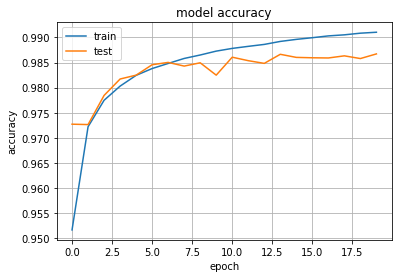

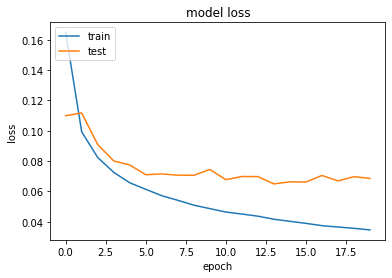

In [8]:
import matplotlib.pyplot as plt
history = result
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

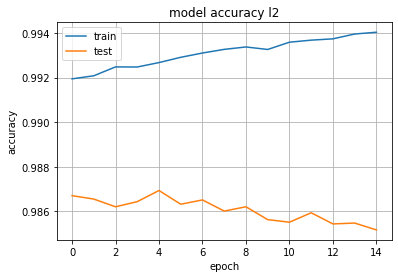

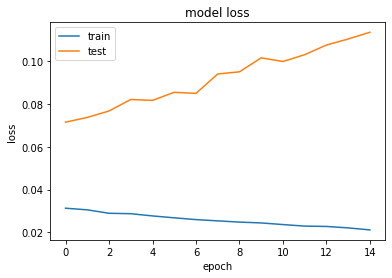

In [9]:
import matplotlib.pyplot as plt
history = result
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy l2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# model_mul.load_weights(os.path.join('checkpoints', 'SVHN_EffB1_299_v2_L2.hdf5'))

In [ ]:
# #Non-Groups
# #Split training and validation
# #Using Expert Data

# savedfilename = os.path.join('checkpoints', 'SVHN_EffB1_299_v2_L3.hdf5')
# checkpointer = ModelCheckpoint(savedfilename,
#                           monitor='val_acc', verbose=1, 
#                           save_best_only=True, mode='max',save_weights_only=True)########

# epochs = 15##!!!
# lr = 1e-4
# decay = lr/epochs
# optimizer = Adam(lr=lr, decay=decay)

# model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

# result = model_mul.fit_generator(
#     generator = train_set, 
#     steps_per_epoch = step_size_train,
#     validation_data = valid_set,
#     validation_steps = step_size_valid,
#     shuffle=True,
#     epochs=epochs,
#     callbacks=[checkpointer],
# #     callbacks=[csv_logger, checkpointer, earlystopping],
# #     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
#     verbose=1) 

In [10]:
# Open a strategy scope.
with strategy.scope():
    model_mul.load_weights(os.path.join('checkpoints', 'SVHN_EffB3_299_v2_upgraded_L2.hdf5'))

In [11]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import time, os
from math import ceil

# PREDICT ON OFFICIAL TEST
train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
#     horizontal_flip=True,
#     vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen1 = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

batch_size = 36

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_set1 = test_datagen1.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

# if NUM_GPU != 1:
predict1=model_mul.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# else:
#     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
predicted_class_indices=np.argmax(predict1,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions1 = [labels[k] for k in predicted_class_indices]

import pandas as pd

filenames=test_set1.filenames
results=pd.DataFrame({"file_name":filenames,
                      "predicted1":predictions1,
                      })
results.to_csv('SVHN_EffB3_299_v2_upgraded_L2_2611.csv')
results.head()

Found 604388 images belonging to 10 classes.
Found 26032 images belonging to 10 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
724/724 [==============================] - 191s 263ms/step


,file_name,predicted1
0,1/00002.png,1
1,1/00005.png,1
2,1/00007.png,1
3,1/00008.png,1
4,1/00013.png,1


In [12]:
np.save(os.path.join('pred_npy','SVHN_EffB3_299_v2_upgraded_L2_2611.npy'), predict1)

In [ ]:
cp SVHN_EffB1_299_v2_upgraded_1910.csv /home/bribeiro/Phong/Nat19/SVHN_EffB1_299_v2_upgraded_1910.csv

In [ ]:
# import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
# import time, os
# from math import ceil

# # PREDICT ON OFFICIAL TEST
# train_datagen = ImageDataGenerator(
# #     rescale = 1./255,
#     rotation_range=30,
#     width_shift_range=0.3,
#     height_shift_range=0.3,
#     shear_range=0.3,
#     zoom_range=0.3,
#     horizontal_flip=True,
#     vertical_flip=True,##
# #     brightness_range=[0.5, 1.5],##
#     channel_shift_range=10,##
#     fill_mode='nearest',
#     preprocessing_function=preprocess_input,
# )

# test_datagen1 = ImageDataGenerator(
# #     rescale = 1./255,
#     preprocessing_function=preprocess_input
# )

# batch_size = 36

# train_set = train_datagen.flow_from_directory('train_resized_299',
#                                                  target_size = (299, 299),
#                                                  batch_size = batch_size,
#                                                  class_mode = 'categorical',
#                                                  shuffle=True,
#                                                  seed=7,
# #                                                  subset="training"
#                                               )

# test_set1 = test_datagen1.flow_from_directory('test_resized_299',
#                                                  target_size = (299, 299),
#                                                  batch_size = batch_size,
#                                                  class_mode = 'categorical',
#                                                  shuffle=False,
#                                                  seed=7,
# #                                                  subset="validation"
#                                              )

# # if NUM_GPU != 1:
# predict1=model_mul.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# # else:
# #     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
# predicted_class_indices=np.argmax(predict1,axis=1)
# labels = (train_set.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# predictions1 = [labels[k] for k in predicted_class_indices]

# import pandas as pd

# filenames=test_set1.filenames
# results=pd.DataFrame({"file_name":filenames,
#                       "predicted1":predictions1,
#                       })
# results.to_csv('SVHN_Eff_B4_299_v2_L3_2109.csv')
# results.head()

In [ ]:
# np.save(os.path.join('pred_npy','SVHN_EffB4_299_v2_L3.npy'), predict1)

In [ ]:
cp SVHN_Eff_B4_299_v2_2009.csv /home/bribeiro/Phong/Nat19/SVHN_Eff_B4_299_v2_2009.csv

In [ ]:
!git clone https://github.com/phohenecker/switch-cuda.git